<a href="https://colab.research.google.com/github/SagarSudani/Objectdetection-and-Image-classification-using-python/blob/main/Object%20Detection%20using%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**links for download file**

In [1]:
!wget -q -nc http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!wget -q -nc http://images.cocodataset.org/annotations/image_info_test2017.zip
!unzip -q -n annotations_trainval2017.zip
!unzip -q -n image_info_test2017.zip


**Collect COCO dataset**

In [2]:
import cv2
from pycocotools.coco import COCO
import os
from sklearn.model_selection import train_test_split

# Define the dataset(COCO 2017)
coco_dataset = "/content/train2017.zip"
annotations_dataset = "/content/annotations_trainval2017.zip"
coco = COCO("/content/annotations/instances_train2017.json")

# Get all image ids
image_ids = coco.getImgIds()

# Split dataset into training and testing sets
train_ids, test_ids = train_test_split(image_ids, test_size=0.2)

# Create directories for train and test sets
os.makedirs('coco_dataset/train',exist_ok=True)
os.makedirs('coco_dataset/test', exist_ok=True)

# Function to copy image and annotation to new folder
def copy_files(image_ids, target_dir):
 for image_id in image_ids:
       img_data = coco.loadImgs(image_id)[0]
       img_file = os.path.join('coco_dataset/images', img_data['file_name'])

# Read and save the image in the new directory
       img = cv2.imread(img_file)
       if img is not None:
         cv2.imwrite(os.path.join(target_dir, img_data['file_name']), img)

# Copy the images for training and testing sets
print("Copying training set...")
copy_files(image_ids=train_ids, target_dir='coco_dataset/train')
print("Copying test set...")
copy_files(image_ids=test_ids, target_dir='coco_dataset/test')

print(f"Training set: {len(train_ids)} images")
print(f"Test set: {len(test_ids)} images")

loading annotations into memory...
Done (t=24.95s)
creating index...
index created!
Copying training set...
Copying test set...
Training set: 94629 images
Test set: 23658 images


**Indentify variation in object type**

loading annotations into memory...
Done (t=28.38s)
creating index...
index created!


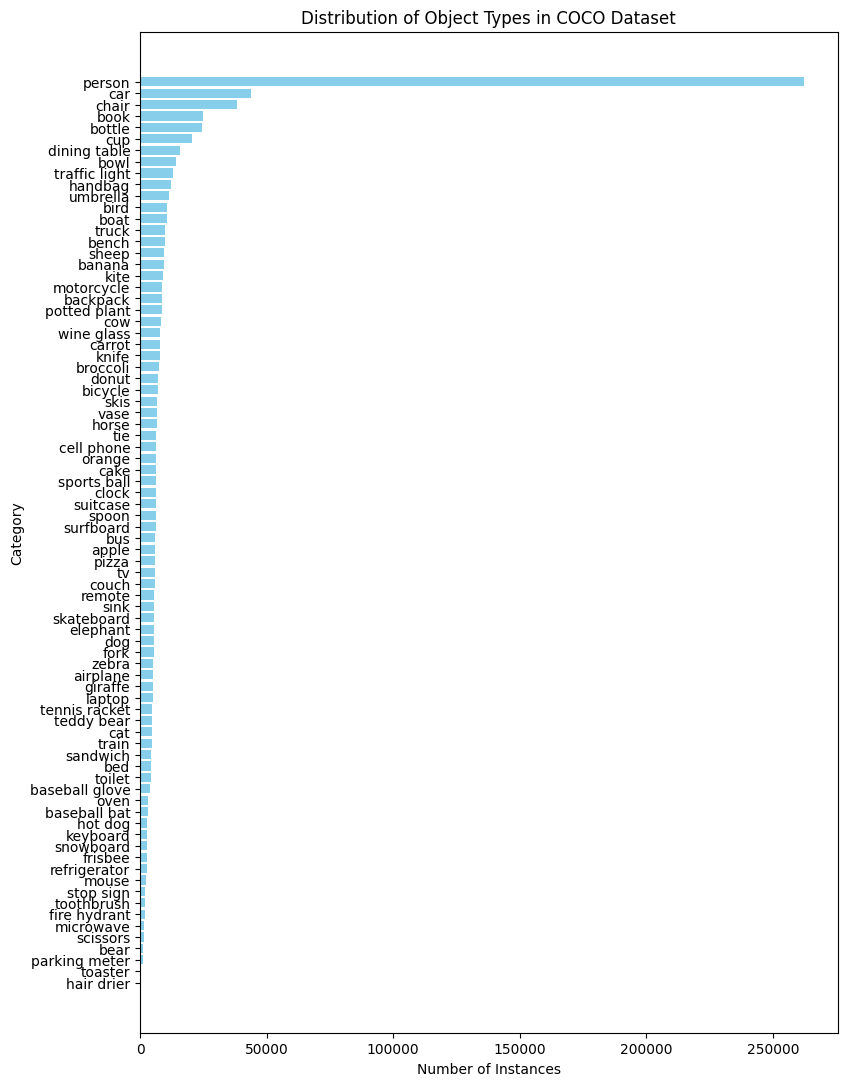

In [3]:
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from collections import Counter
import os

# Load COCO annotations from the extracted json file
coco = COCO('/content/annotations/instances_train2017.json')

# Get all category IDs and corresponding names
categories = coco.loadCats(coco.getCatIds())
category_names = {cat['id']: cat['name'] for cat in categories}
category_values = list(category_names.values())

# Get all annotations
annotations = coco.loadAnns(coco.getAnnIds())

# Count the number of instances for each category
category_count = Counter()

for ann in annotations:
    category_id = ann['category_id']
    category_count[category_id] += 1

# Map category IDs back to their names for visualization
category_names_ordered = [category_names[cat_id] for cat_id in category_count.keys()]
category_values = list(category_count.values())

# Sort categories based on their frequency for better visualization
sorted_categories = sorted(zip(category_values, category_names_ordered), reverse=True)
category_values_sorted, category_names_sorted = zip(*sorted_categories)

# Plot the distribution of object types
plt.figure(figsize=(9, 13))
plt.barh(category_names_sorted, category_values_sorted, color='skyblue')
plt.xlabel('Number of Instances')
plt.ylabel('Category')
plt.title('Distribution of Object Types in COCO Dataset')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.show()

**Model Implementation**

In [4]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5 && pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17088, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 17088 (delta 22), reused 7 (delta 7), pack-reused 17057 (from 5)
Receiving objects: 100% (17088/17088), 15.70 MiB | 21.34 MiB/s, done.
Resolving deltas: 100% (11722/11722), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 34.0 MB/s eta 0:00:00


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-5 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 89.3M/89.3M [00:01<00:00, 73.1MB/s]

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients, 109.0 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 259x194 1 cat
Speed: 1.8ms pre-process, 33.4ms inference, 8.2ms NMS per image at shape (1, 3, 640, 480)


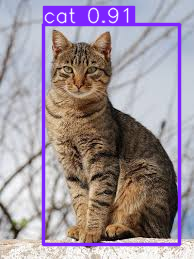

In [13]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

#pretrained model coco dataset
model = torch.hub.load('ultralytics/yolov5', 'yolov5l', pretrained=True)

img_path = '/content/download.jpeg'  # Replace with your image file path

img = cv2.imread(img_path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

results = model(img_rgb)

# Print results (bounding boxes, labels, and confidence scores)
results.print()

# Plot the image with bounding boxes and labels
results.show()


**Metrics of Model**

In [7]:
!pip install ultralytics

In [14]:
from ultralytics import YOLO


model = YOLO("yolov5l.pt")

results = model.val(data="coco128.yaml")


Map_score = results.box.map
precision_score = results.box.p
recall_score = results.box.r

print("MAP Score:", Map_score)
print("Precision Score:", precision_score)
print("Recall Score:", recall_score)
print("mAP Score:", Map_score)

PRO TIP 💡 Replace 'model=yolov5l.pt' with new 'model=yolov5lu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 102M/102M [00:05<00:00, 18.2MB/s]


Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5l summary (fused): 303 layers, 53,193,088 parameters, 0 gradients, 135.0 GFLOPs


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]


                   all        128        929      0.769      0.746      0.822      0.646
                person         61        254      0.885       0.74      0.846      0.658
               bicycle          3          6       0.52      0.367      0.629      0.353
                   car         12         46          1      0.379      0.575      0.327
            motorcycle          4          5      0.847          1      0.995      0.827
              airplane          5          6       0.91          1      0.995      0.941
                   bus          5          7      0.791      0.714      0.867      0.794
                 train          3          3      0.824          1      0.995      0.962
                 truck          5         12      0.764      0.542      0.663      0.402
                  boat          2          6          1      0.626      0.788      0.564
         traffic light          4         14          1      0.348      0.472      0.264
             stop sig

**Hyperparameter**

In [16]:
from ultralytics import YOLO


model = YOLO("/content/yolov5l.pt")

# Tune hyperparameters on COCO128 for 30 epochs
model.tune(data="coco128.yaml", epochs=30, iterations=1, optimizer="AdamW", plots=False, save=False, val=False)



PRO TIP 💡 Replace 'model=/content/yolov5l.pt' with new 'model=/content/yolov5lu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune3'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/1 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
WARNING ❌️ training failure for hyperparameter tuning iteration 1
Command 'yolo train task=detect mode=train model=/content/yolov5l.pt data=coco128.